<a href="https://colab.research.google.com/github/jbmmbj/m494/blob/main/FrEIA_Quickstart_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install FrEIA

  Preparing metadata (setup.py) ... done
  Created wheel for FrEIA: filename=FrEIA-0.2-py3-none-any.whl size=42759 sha256=3d2d15c24d2018fd3dd5fe8a439d5705958be442032a2065a0e696f42a598c52
  Stored in directory: /root/.cache/pip/wheels/81/a8/e2/d532a76f72108ac4a340cbe3f86b4f591abfdbd75209a5badb
Successfully built FrEIA


In [2]:

# standard imports
import torch
import torch.nn as nn
from sklearn.datasets import make_moons

# FrEIA imports
import FrEIA.framework as Ff
import FrEIA.modules as Fm

BATCHSIZE = 100
N_DIM = 2

# we define a subnet for use inside an affine coupling block
# for more detailed information see the full tutorial
def subnet_fc(dims_in, dims_out):
    return nn.Sequential(nn.Linear(dims_in, 512), nn.ReLU(),
                         nn.Linear(512,  dims_out))

# a simple chain of operations is collected by ReversibleSequential
inn = Ff.SequenceINN(N_DIM)
for k in range(8):
    inn.append(Fm.AllInOneBlock, subnet_constructor=subnet_fc, permute_soft=True)

optimizer = torch.optim.Adam(inn.parameters(), lr=0.001)

# a very basic training loop
for i in range(1000):
    optimizer.zero_grad()
    # sample data from the moons distribution
    data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
    x = torch.Tensor(data)
    # pass to INN and get transformed variable z and log Jacobian determinant
    z, log_jac_det = inn(x)
    # calculate the negative log-likelihood of the model with a standard normal prior
    loss = 0.5*torch.sum(z**2, 1) - log_jac_det
    loss = loss.mean() / N_DIM
    # backpropagate and update the weights
    loss.backward()
    optimizer.step()

# sample from the INN by sampling from a standard normal and transforming
# it in the reverse direction
z = torch.randn(BATCHSIZE, N_DIM)
samples, _ = inn(z, rev=True)

In [3]:
z, log_jac_det = inn(x)

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-7-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


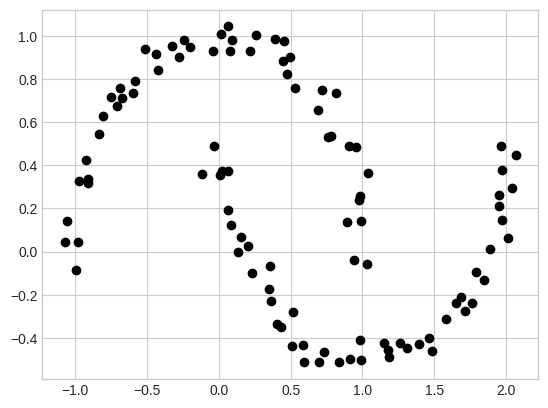

In [22]:
plt.plot(data[:,0], data[:,1], 'o', color='black');

In [29]:
q = z.detach().numpy()

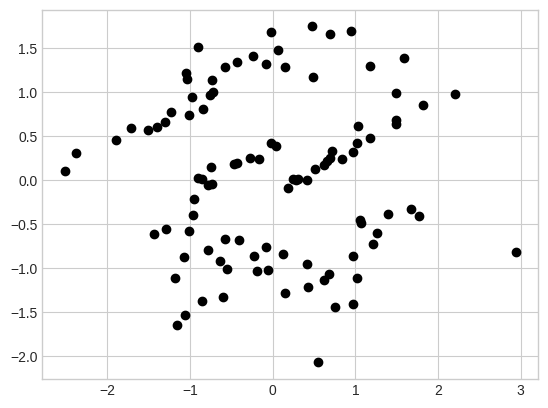

In [30]:
plt.plot(q[:,0], q[:,1], 'o', color='black');

In [37]:
log_jac_det.shape

torch.Size([100])

In [38]:
label

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [39]:
0.5*torch.sum(z**2, 1)

tensor([0.3777, 2.0271, 0.6603, 1.0341, 1.7247, 1.6485, 1.4492, 0.0389, 1.3272,
        0.0489, 0.0845, 0.6788, 0.9803, 0.8066, 0.4703, 0.9111, 0.3623, 1.3116,
        1.3209, 0.0207, 0.9210, 0.5234, 0.9869, 0.8496, 2.2979, 0.2384, 1.6449,
        0.1118, 1.8951, 0.4106, 1.5350, 0.9979, 3.1609, 0.7187, 0.9946, 0.5400,
        1.6478, 1.2847, 1.4537, 0.2061, 0.2917, 0.7966, 2.8633, 0.7651, 1.3349,
        0.0901, 1.8965, 0.8810, 0.2910, 0.8244, 0.2690, 0.9612, 0.8476, 0.6829,
        0.9966, 1.0532, 4.6593, 0.1374, 0.3870, 1.1005, 0.0295, 1.0600, 0.2720,
        0.6259, 0.5546, 0.3098, 0.0691, 1.2175, 0.8396, 1.6219, 0.8105, 0.7859,
        1.0692, 0.0772, 2.0274, 0.3614, 0.0437, 1.1349, 0.8409, 1.4181, 0.3929,
        0.6312, 0.6913, 0.7613, 1.1579, 0.6048, 1.5604, 1.3084, 0.5469, 0.1283,
        0.6586, 1.2106, 2.9069, 2.2218, 1.6119, 1.2926, 0.3085, 1.0537, 0.3132,
        0.5237], grad_fn=<MulBackward0>)

In [ ]:
z

In [44]:
p = samples.detach().numpy()

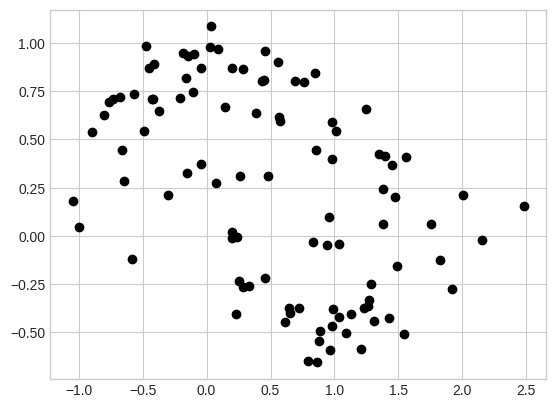

In [45]:
plt.plot(p[:,0], p[:,1], 'o', color='black');